In [1]:
%pip install tensorflow-datasets


Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install tensorflow tensorflow-datasets numpy pandas matplotlib seaborn jupyter ipykernel scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install --upgrade pip
%pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Construct a tf.data.Dataset
ds = tfds.load('mnist', split='train', shuffle_files=True)

# Build your input pipeline
ds = ds.shuffle(1024).batch(32).prefetch(tf.data.AUTOTUNE)
for example in ds.take(1):
  image, label = example["image"], example["label"]

In [5]:
%pip install numpy matplotlib tensorflow scikit-learn


Note: you may need to restart the kernel to use updated packages.


 <!-- Build the Model
  -->

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [7]:
# Load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN input: (28, 28, 1)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# One-hot encode labels
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)


In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\gowth\Downloads\CCTV_detection\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train_cat,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks=[early_stop])


Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.6640 - loss: 0.9247 - val_accuracy: 0.8440 - val_loss: 0.4118
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.8508 - loss: 0.4090 - val_accuracy: 0.8698 - val_loss: 0.3355
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.8793 - loss: 0.3314 - val_accuracy: 0.8887 - val_loss: 0.2964
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.8963 - loss: 0.2907 - val_accuracy: 0.8908 - val_loss: 0.2911
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9005 - loss: 0.2707 - val_accuracy: 0.9038 - val_loss: 0.2610
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.9079 - loss: 0.2481 - val_accuracy: 0.9063 - val_loss: 0.2543
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.9169 - loss: 0.2296 - val_accuracy: 0.9097 - val_loss: 0.2427
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.9202 - loss: 0.2155 - 

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9169 - loss: 0.2518
Test Accuracy: 0.9165


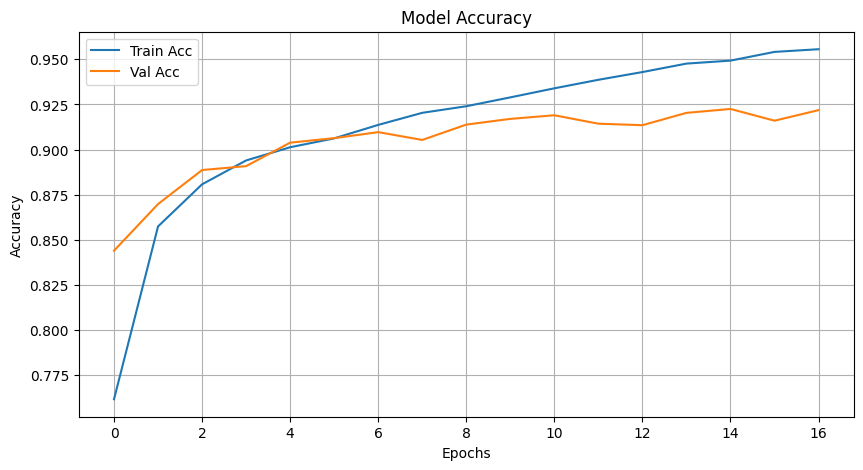

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


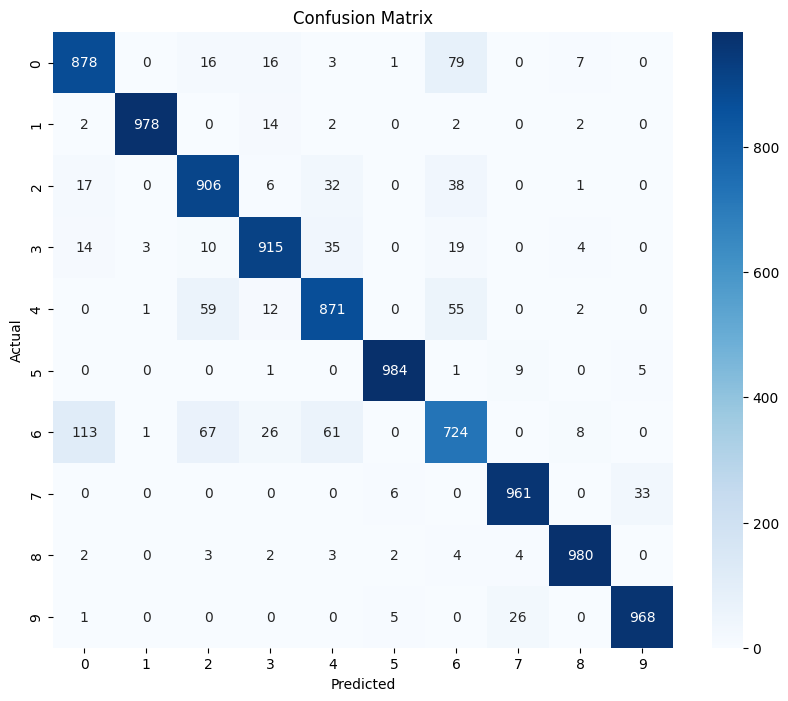


Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.91      0.88      1000
           3       0.92      0.92      0.92      1000
           4       0.86      0.87      0.87      1000
           5       0.99      0.98      0.98      1000
           6       0.79      0.72      0.75      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [12]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes))


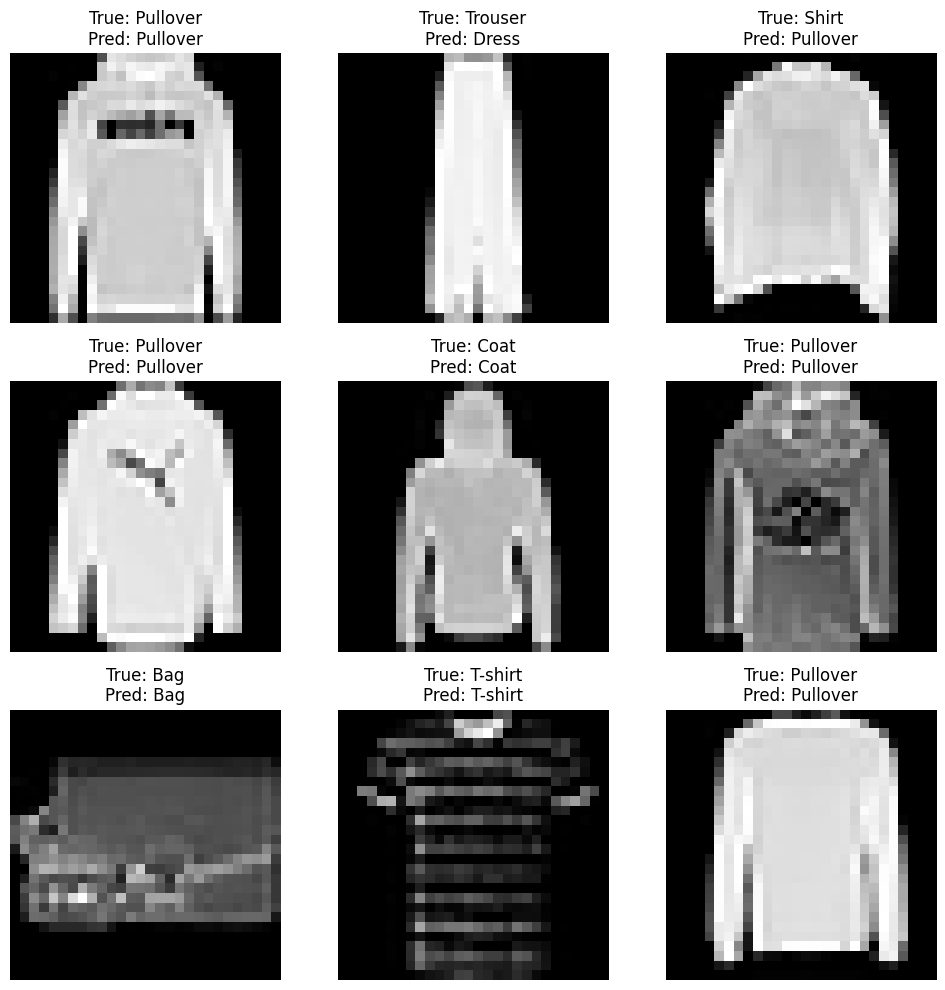

In [13]:
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10, 10))
for i in range(9):
    idx = np.random.randint(0, len(X_test))
    img = X_test[idx].squeeze()
    true_label = class_names[y_test[idx]]
    pred_label = class_names[y_pred_classes[idx]]

    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Load and preprocess Fashion-MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Resize to 96x96 and convert to 3 channels (MobileNetV2 expects 96x96x3)
X_train = tf.image.resize_with_pad(tf.expand_dims(X_train, -1), 96, 96)
X_test = tf.image.resize_with_pad(tf.expand_dims(X_test, -1), 96, 96)
X_train = tf.image.grayscale_to_rgb(X_train) / 255.0
X_test = tf.image.grayscale_to_rgb(X_test) / 255.0

# One-hot encode labels
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

# Load MobileNetV2 without top layer
base_model = MobileNetV2(input_shape=(96, 96, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze initially

# Add custom top layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train only the top layers first
model.fit(X_train, y_train_cat, validation_split=0.1, epochs=5, batch_size=128)

# Unfreeze some base model layers (fine-tuning)
base_model.trainable = True
for layer in base_model.layers[:100]:  # Freeze first 100 layers (adjust as needed)
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),  # Low LR for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Add EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fine-tune the full model
history = model.fit(X_train, y_train_cat,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks=[early_stop])


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 281s 636ms/step - accuracy: 0.7814 - loss: 0.6288 - val_accuracy: 0.8825 - val_loss: 0.3138
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 243s 576ms/step - accuracy: 0.8820 - loss: 0.3195 - val_accuracy: 0.8967 - val_loss: 0.2773
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 238s 563ms/step - accuracy: 0.8961 - loss: 0.2850 - val_accuracy: 0.8955 - val_loss: 0.2718
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 239s 567ms/step - accuracy: 0.9028 - loss: 0.2625 - val_accuracy: 0.8963 - val_loss: 0.2846
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 269s 638ms/step - accuracy: 0.9082 - loss: 0.2448 - val_accuracy: 0.9047 - val_loss: 0.2633
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 468s 1s/step - accuracy: 0.7027 - loss: 1.2182 - val_accuracy: 0.8937 - val_loss: 0.2965
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 441s 1s/step - accuracy: 0.8534 - loss: 0.4380 - val_accuracy: 0.8905 - val_loss: 0.3041
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 454s 1s/step - accuracy: 0.8824 - loss: 0.3348 